Chapter 19: Derivatives Valuation

In [17]:
import sys
import os


target_path = os.path.abspath("../dx") #상위폴더의 dx폴더
sys.path.append(target_path)
import numpy as np

In [5]:
from dx_frame import *

In [6]:
me_gbm = market_environment('me_gbm', dt.datetime(2020, 1, 1))
me_gbm.add_constant('initial_value', 36.)
me_gbm.add_constant('volatility', 0.2)
me_gbm.add_constant('final_date', dt.datetime(2020, 12, 31))
me_gbm.add_constant('currency', 'EUR')
me_gbm.add_constant('frequency', 'M')  
me_gbm.add_constant('paths', 10000)
csr = constant_short_rate('csr', 0.06)
me_gbm.add_curve('discount_curve', csr)

In [7]:
from geometric_brownian_motion import geometric_brownian_motion
gbm = geometric_brownian_motion('gbm', me_gbm)

In [8]:
me_call = market_environment('me_call', me_gbm.pricing_date)

In [9]:
me_call.add_constant('strike', 40.)
me_call.add_constant('maturity', dt.datetime(2020, 12, 31))
me_call.add_constant('currency', 'EUR')

In [ ]:
payoff_func = 'np.maximum(maturity_value - strike, 0)'

In [11]:
from valuation_mcs_european import valuation_mcs_european

In [12]:
eur_call = valuation_mcs_european('eur_call', underlying=gbm,
mar_env=me_call, payoff_func=payoff_func)

In [13]:
%time eur_call.present_value()  

CPU times: total: 0 ns
Wall time: 6.32 ms


c:\Users\user\Documents\GitHub\Python_Finance\dx\simulation_class.py:71: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_grid = pd.date_range(start=start, end=end,


np.float64(2.308429)

In [14]:
%time eur_call.delta() 

CPU times: total: 0 ns
Wall time: 5.44 ms


np.float64(0.5074)

In [15]:
%time eur_call.vega()

CPU times: total: 0 ns
Wall time: 8.12 ms


np.float64(15.1853)

In [18]:
%%time
s_list = np.arange(34., 46.1, 2.)
p_list = []; d_list = []; v_list = []
for s in s_list:
    eur_call.update(initial_value=s)
    p_list.append(eur_call.present_value(fixed_seed=True))
    d_list.append(eur_call.delta())
    v_list.append(eur_call.vega())

CPU times: total: 156 ms
Wall time: 120 ms


In [19]:
from plot_option_stats import plot_option_stats

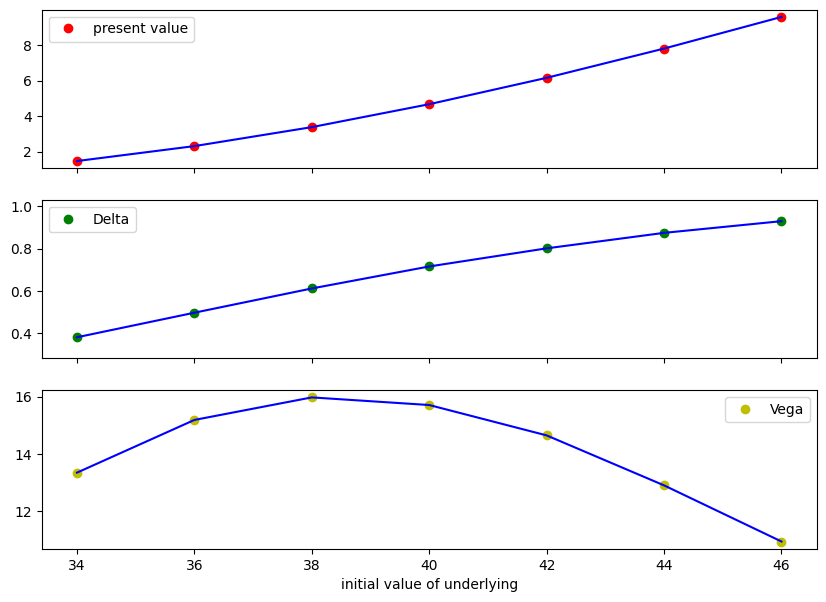

In [20]:
plot_option_stats(s_list, p_list, d_list, v_list)

Figure 19-1. Present value, delta, and vega estimates for European call option

In [21]:
payoff_func = 'np.maximum(0.33 * '
payoff_func += '(maturity_value + max_value) - 40, 0)'  

In [22]:
eur_as_call = valuation_mcs_european('eur_as_call', underlying=gbm,
mar_env=me_call, payoff_func=payoff_func)

In [23]:
%%time
s_list = np.arange(34., 46.1, 2.)
p_list = []; d_list = []; v_list = []
for s in s_list:
    eur_as_call.update(s)
    p_list.append(eur_as_call.present_value(fixed_seed=True))
    d_list.append(eur_as_call.delta())
    v_list.append(eur_as_call.vega())

CPU times: total: 109 ms
Wall time: 97.8 ms


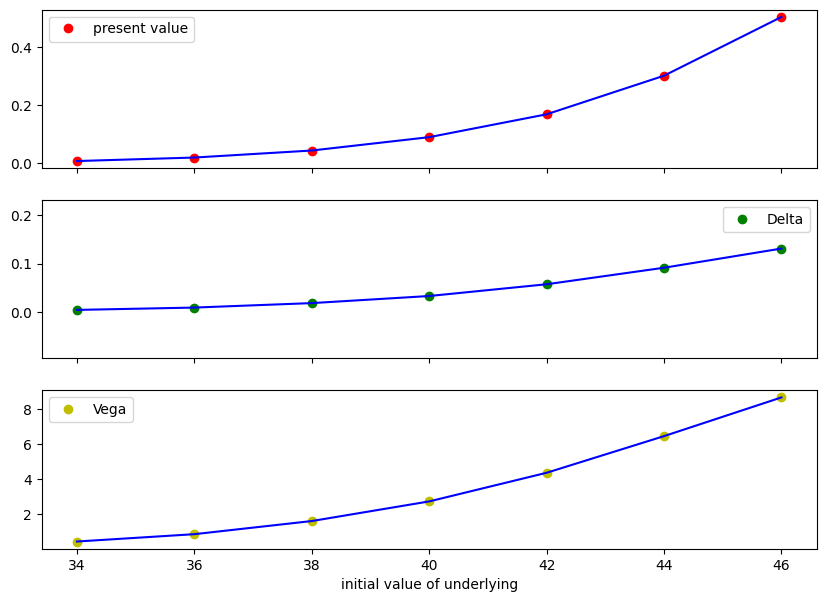

In [24]:
plot_option_stats(s_list, p_list, d_list, v_list)

Figure 19-2. Present value, delta, and vega estimates for option with Asian feature